In [2]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

In [9]:
samples.shape

(178, 13)

In [10]:
labels.shape

(178,)

Standardization of Data


1.

In [21]:
import numpy as np
from matplotlib import pyplot as plt

X = samples.T # Data matrix


In [13]:
mean_vec = X.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

centered_X = X - mean_mat

Centered_x is the data centered so that each attribute has zero mean.

In [40]:
new_mean=centered_X.mean(axis=1)
print(new_mean)

[ 6.38690100e-15  3.59263181e-16 -1.11396535e-15 -1.59672525e-16
 -6.38690100e-16 -1.99590656e-17  9.97953281e-16 -6.98567296e-17
 -9.68014682e-16 -8.18321690e-16  3.89201779e-16  1.55680712e-15
 -1.22628499e-13]


Computing the mean of centered_X verifies that each attribute has approximately zero mean.

2.


(2, 178)


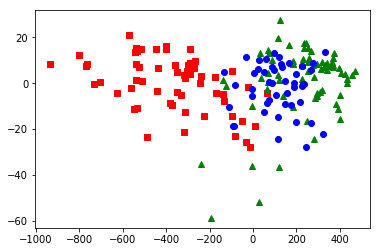

In [42]:
U, s, Vh = np.linalg.svd(centered_X)

U_2 = U[:,0:2]

X_tilde = U_2.T@centered_X

print(X_tilde.shape)

for q in range (178):
    if labels[q] ==0 :
        plt.plot(X_tilde[0,q],X_tilde[1,q], 'rs')
    elif labels[q] ==1 :
        plt.plot(X_tilde[0,q],X_tilde[1,q], 'g^')
    else:
        plt.plot(X_tilde[0,q],X_tilde[1,q], 'bo')

The scatterplot is shown above for the wine dataset after PCA has taken place.


3.

In [50]:
var_vec = np.std(centered_X,axis = 1)
var_mat = np.tile(var_vec.reshape(X.shape[0],1),[1,X.shape[1]])

unit_var=np.divide(centered_X,var_mat) 

Unit_var is the centered wine dataset that is normalized with unit variance.

In [52]:
variance=np.std(unit_var,axis = 1)
print(variance)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Computing the variance of unit_var verifies that each attribute has unit variance.

4.


(2, 178)


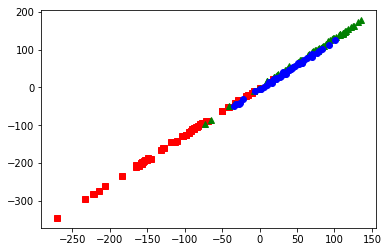

In [54]:
U2, s2, Vh2 = np.linalg.svd(unit_var)

U2_2 = U2[:,0:2]

X_tilde2 = U2_2.T@centered_X

print(X_tilde2.shape)

for q in range (178):
    if labels[q] ==0 :
        plt.plot(X_tilde2[0,q],X_tilde2[1,q], 'rs')
    elif labels[q] ==1 :
        plt.plot(X_tilde2[0,q],X_tilde2[1,q], 'g^')
    else:
        plt.plot(X_tilde2[0,q],X_tilde2[1,q], 'bo')

5.
In my opinion, the PCA with centered and normalized data would lead to better classification performance.
By normalizing the data to have unit variance, the data becomes less broad and makes it easier for the classifier to 
function properly. This is because the classifier can more clearly identify specific regions in which the data is 
seperated in.


Naive Bayes Classification

1.

In [104]:
fold1=X_tilde2[:,0:143]
fold2=np.concatenate((X_tilde2[:,0:108],X_tilde2[:,143:178]),axis=1)
fold3=np.concatenate((X_tilde2[:,0:72],X_tilde2[:,108:178]),axis=1)
fold4=np.concatenate((X_tilde2[:,0:36],X_tilde2[:,72:178]),axis=1)
fold5=X_tilde2[:,36:178]

2.

Case 3

In [135]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(fold1.T,labels[0:143])
c3_1=clf.predict(np.transpose(X_tilde2[:,143:178]))

accuracy1=(c3_1-labels[143:178])

In [136]:
clf.fit(fold2.T,np.concatenate((labels[0:108],labels[143:178]),axis=0))
c3_2=clf.predict(np.transpose(X_tilde2[:,108:143]))
accuracy2=c3_2-labels[108:143]

clf.fit(fold3.T,np.concatenate((labels[0:72],labels[108:178]),axis=0))
c3_3=clf.predict(np.transpose(X_tilde2[:,72:108]))
accuracy3=c3_3-labels[72:108]
        
clf.fit(fold4.T,np.concatenate((labels[0:36],labels[72:178]),axis=0))
c3_4=clf.predict(np.transpose(X_tilde2[:,36:72])) 
accuracy4=c3_4-labels[36:72]

clf.fit(fold5.T,labels[36:178])
c3_5=clf.predict(np.transpose(X_tilde2[:,0:36]))
accuracy5=c3_5-labels[0:36]

In [146]:
incorrect3=np.count_nonzero(accuracy1)+np.count_nonzero(accuracy2)+np.count_nonzero(accuracy3)+np.count_nonzero(accuracy4)+np.count_nonzero(accuracy5)
print(incorrect3);

57


In [147]:
Accuracy_case3= (178-incorrect3)/178
print(Accuracy_case3)

0.6797752808988764


Case 2

In [159]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(fold1.T,labels[0:143])
c3_1=clf.predict(np.transpose(X_tilde2[:,143:178]))

accuracy1=(c3_1-labels[143:178])

In [160]:
clf.fit(fold2.T,np.concatenate((labels[0:108],labels[143:178]),axis=0))
c3_2=clf.predict(np.transpose(X_tilde2[:,108:143]))
accuracy2=c3_2-labels[108:143]

clf.fit(fold3.T,np.concatenate((labels[0:72],labels[108:178]),axis=0))
c3_3=clf.predict(np.transpose(X_tilde2[:,72:108]))
accuracy3=c3_3-labels[72:108]
        
clf.fit(fold4.T,np.concatenate((labels[0:36],labels[72:178]),axis=0))
c3_4=clf.predict(np.transpose(X_tilde2[:,36:72])) 
accuracy4=c3_4-labels[36:72]

clf.fit(fold5.T,labels[36:178])
c3_5=clf.predict(np.transpose(X_tilde2[:,0:36]))
accuracy5=c3_5-labels[0:36]

In [162]:
incorrect2=np.count_nonzero(accuracy1)+np.count_nonzero(accuracy2)+np.count_nonzero(accuracy3)+np.count_nonzero(accuracy4)+np.count_nonzero(accuracy5)
print(incorrect2);

57


In [163]:
Accuracy_case2= (178-incorrect3)/178
print(Accuracy_case2)

0.6797752808988764


Case 1

In [156]:
clf=GaussianNB()
clf.fit(fold1.T,labels[0:143])
c3_1=clf.predict(np.transpose(X_tilde[:,143:178]))
accuracy1=(c3_1-labels[143:178])

clf.fit(fold2.T,np.concatenate((labels[0:108],labels[143:178]),axis=0))
c3_2=clf.predict(np.transpose(X_tilde[:,108:143]))
accuracy2=c3_2-labels[108:143]

clf.fit(fold3.T,np.concatenate((labels[0:72],labels[108:178]),axis=0))
c3_3=clf.predict(np.transpose(X_tilde[:,72:108]))
accuracy3=c3_3-labels[72:108]
        
clf.fit(fold4.T,np.concatenate((labels[0:36],labels[72:178]),axis=0))
c3_4=clf.predict(np.transpose(X_tilde[:,36:72])) 
accuracy4=c3_4-labels[36:72]

clf.fit(fold5.T,labels[36:178])
c3_5=clf.predict(np.transpose(X_tilde[:,0:36]))
accuracy5=c3_5-labels[0:36]

incorrect1=np.count_nonzero(accuracy1)+np.count_nonzero(accuracy2)+np.count_nonzero(accuracy3)+np.count_nonzero(accuracy4)+np.count_nonzero(accuracy5)
print(incorrect1);

67


In [158]:
Accuracy_case1=(178-incorrect1)/178
print(Accuracy_case1)

0.6235955056179775


3.


The classification accuracy of Case 1 with only centered data is 62.36% The classification accuracy of Case 2 and 3 is 67.98% The accuracy of our classifier improved when we standardized the data to have unit variance 1. This enabled the classification algorithm to effectively classify the wines based on the training data since we removed variation among the data points.